Скачиваем библиотеки

In [1]:
!pip install pandas
!pip install sklearn
!pip install -U scikit-learn
!pip install numpy
!pip install matplotlib

  Using cached pandas-2.2.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (19 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.0 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)
Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'


импортируем библиотеки

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from numpy import mean
from numpy.random import randn
from numpy.random import rand
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import ValidationCurveDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit
from datetime import date,timedelta


Загружаем данные

In [3]:
expenses = pd.read_csv('expenses_new.csv')
orders = pd.read_csv('orders_new.csv')
visitation = pd.read_csv('visitation_new.csv')
user_data = pd.read_csv('user_data.csv')

In [4]:
user_data

,User Id,Region,Device,Channel,Revenue,costs
0,981449118918,Russia,iPhone,organic,4.99,6.24
1,278965908054,Russia,iPhone,organic,4.99,5.04
2,590706206550,Russia,Mac,organic,4.99,6.96
3,326433527971,Russia,Android,TipTop,4.99,9.36
4,349773784594,Russia,Mac,organic,4.99,11.04
...,...,...,...,...,...,...
1443,755840663757,Russia,iPhone,organic,4.99,4.00
1444,29210193047,Russia,iPhone,organic,4.99,6.40
1445,735968289275,Russia,Mac,FaceBoom,4.99,8.80
1446,40244695943,Russia,Android,organic,4.99,8.80


In [5]:
orders

,User Id,Event Dt,Revenue
0,188246423999,2022-05-01 23:09:52,4.99
1,174361394180,2022-05-01 12:24:04,4.99
2,529610067795,2022-05-01 11:34:04,4.99
3,319939546352,2022-05-01 15:34:40,4.99
4,366000285810,2022-05-01 13:59:51,4.99
...,...,...,...
39791,651604369137,2022-10-31 16:19:07,4.99
39792,275341387049,2022-10-31 01:17:17,4.99
39793,374656616484,2022-10-31 06:17:29,4.99
39794,168548862926,2022-10-31 22:46:19,4.99


# 3.1 Сегментация пользователей

приводим время в Event Dt в нормальное состояние и убирвем не нужные колонки

In [8]:
orders['Event Dt'] = pd.to_datetime(orders['Event Dt'])
orders = orders.drop(columns=['User Id'])
orders = orders.drop(columns=['Revenue'])

In [9]:
orders

,Event Dt
0,2022-05-01 23:09:52
1,2022-05-01 12:24:04
2,2022-05-01 11:34:04
3,2022-05-01 15:34:40
4,2022-05-01 13:59:51
...,...
39791,2022-10-31 16:19:07
39792,2022-10-31 01:17:17
39793,2022-10-31 06:17:29
39794,2022-10-31 22:46:19


Соеденяем их

In [10]:
user_data = user_data.join(orders)

In [11]:
user_data

,User Id,Region,Device,Channel,Revenue,costs,Event Dt
0,981449118918,Russia,iPhone,organic,4.99,6.24,2022-05-01 23:09:52
1,278965908054,Russia,iPhone,organic,4.99,5.04,2022-05-01 12:24:04
2,590706206550,Russia,Mac,organic,4.99,6.96,2022-05-01 11:34:04
3,326433527971,Russia,Android,TipTop,4.99,9.36,2022-05-01 15:34:40
4,349773784594,Russia,Mac,organic,4.99,11.04,2022-05-01 13:59:51
...,...,...,...,...,...,...,...
1443,755840663757,Russia,iPhone,organic,4.99,4.00,2022-05-25 01:53:24
1444,29210193047,Russia,iPhone,organic,4.99,6.40,2022-05-25 02:13:02
1445,735968289275,Russia,Mac,FaceBoom,4.99,8.80,2022-05-25 18:35:28
1446,40244695943,Russia,Android,organic,4.99,8.80,2022-05-25 16:41:55


Сделаем RFM-анализ. Он делит пользователей на сегменты в зависимости от давности (Recency), частоты (Frequency) и общей суммы платежей (Monetary).

In [13]:
last_date = user_data['Event Dt'].max() + timedelta(days=1)
rfmTable = user_data.reset_index().groupby('User Id').agg({'Event Dt': lambda x: (last_date - x.max()).days, 
                                                 'User Id': lambda x: len(x), 
                                                 'costs': lambda x: x.sum()})
rfmTable.rename(columns={'Event Dt': 'recency', 
                          'User Id': 'frequency', 
                          'costs': 'monetary_value'}, inplace=True)

Смотрим на него

In [14]:
rfmTable

,recency,frequency,monetary_value
User Id,,,
2346324608,8,1,8.00
2396619302,17,1,7.80
2603833648,8,1,16.00
4805773801,7,1,17.00
5015155420,16,1,9.30
...,...,...,...
996040323520,8,1,11.50
997065722971,10,1,14.28
997723904855,11,2,20.65


Теперь нам нужно выставить оценки. Разобьем на диапазон от 1 до 5. Чем шире диапазон, тем точнее наши группы, но в то же время сложнее работать с большим количеством комбинаций.

In [15]:

quantiles = rfmTable.quantile(q=[0.20, 0.40, 0.60, 0.80])
quantiles = quantiles.to_dict()
segmented_rfm = rfmTable

def RScore(x,p,d):
     if x <= d[p][0.20]:
         return 1
     elif x <= d[p][0.40]:
         return 2
     elif x <= d[p][0.60]: 
         return 3
     elif x<=d[p][0.80]:
         return 4
     else:
         return 5

segmented_rfm['r_quartile'] = segmented_rfm['recency'].apply(RScore, args=('recency',quantiles,))
segmented_rfm['f_quartile'] = segmented_rfm['frequency'].apply(RScore, args=('frequency',quantiles,))
segmented_rfm['m_quartile'] = segmented_rfm['monetary_value'].apply(RScore, args=('monetary_value',quantiles,))
segmented_rfm['RFMScore'] = segmented_rfm.r_quartile.map(str) + segmented_rfm.f_quartile.map(str) + segmented_rfm.m_quartile.map(str)
print(segmented_rfm.head())

            recency  frequency  monetary_value  r_quartile  f_quartile  \
User Id                                                                  
2346324608        8          1             8.0           3           1   
2396619302       17          1             7.8           5           1   
2603833648        8          1            16.0           3           1   
4805773801        7          1            17.0           2           1   
5015155420       16          1             9.3           4           1   

            m_quartile RFMScore  
User Id                          
2346324608           2      312  
2396619302           2      512  
2603833648           3      313  
4805773801           4      214  
5015155420           2      412  


Отдельно мы можем увидеть среднее значение новизны для всех RFMScore.

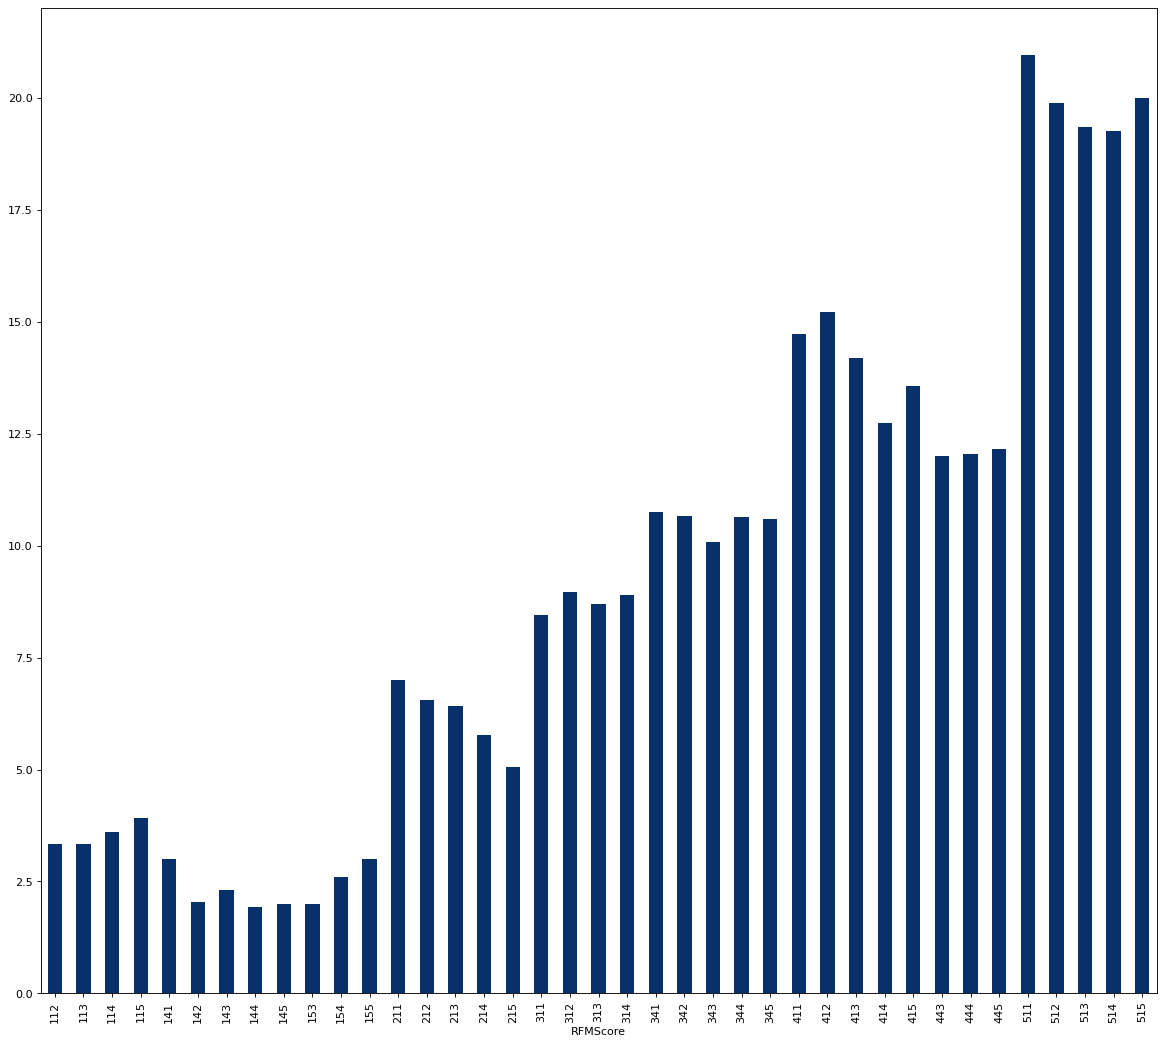

In [16]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
segmented_rfm.groupby('RFMScore').agg('recency').mean().plot(kind='bar', colormap='Blues_r')
plt.show()


Примеры интерпретации сегментов RFM-анализа:

    R=5, F=5, M=5 — платят часто, много и недавно. Самые лояльные и активные пользователи.
    R=1, F=1, M=1 – платят мало, редко и долго. Скорее всего потеряны клиенты. Возможно, не стоит предпринимать действия по их возврату, если стоимость привлечения превышает ожидаемую прибыль.
    R=1/2, F=4/5, M=4/5 — лояльные пользователи на грани ухода. Мы предлагаем им бонус, скидку и стараемся их вернуть.
    R=4/5, F=1, M=1/2/3/4/5 — Пользователи недавно совершили платеж. Мы стараемся стимулировать их покупать больше.

Сохраняем его

In [19]:
segmented_rfm.to_csv('segmented_rfm.csv',index=False)

# 3.2 Построение регрессионной модели

Данные разделенны 20 на 80 ведь это дает наилучший результат для обучения модели

В данном коде используеться метрика r2_score ведь она на мой взгляд дает лучший результат чем другие метрики и даст наилучший результат в данной задаче

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <msup>
    <mi>R</mi>
    <mn>2</mn>
  </msup>
  <mo stretchy="false">(</mo>
  <mi>y</mi>
  <mo>,</mo>
  <mrow data-mjx-texclass="ORD">
    <mover>
      <mi>y</mi>
      <mo stretchy="false">^</mo>
    </mover>
  </mrow>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <mn>1</mn>
  <mo>&#x2212;</mo>
  <mfrac>
    <mrow>
      <munderover>
        <mo data-mjx-texclass="OP">&#x2211;</mo>
        <mrow data-mjx-texclass="ORD">
          <mi>i</mi>
          <mo>=</mo>
          <mn>1</mn>
        </mrow>
        <mrow data-mjx-texclass="ORD">
          <msub>
            <mi>n</mi>
            <mrow data-mjx-texclass="ORD">
              <mi>s</mi>
              <mi>a</mi>
              <mi>m</mi>
              <mi>p</mi>
              <mi>l</mi>
              <mi>e</mi>
              <mi>s</mi>
            </mrow>
          </msub>
        </mrow>
      </munderover>
      <mo stretchy="false">(</mo>
      <msub>
        <mi>y</mi>
        <mi>i</mi>
      </msub>
      <mo>&#x2212;</mo>
      <msub>
        <mrow data-mjx-texclass="ORD">
          <mover>
            <mi>y</mi>
            <mo stretchy="false">^</mo>
          </mover>
        </mrow>
        <mi>i</mi>
      </msub>
      <msup>
        <mo stretchy="false">)</mo>
        <mn>2</mn>
      </msup>
    </mrow>
    <mrow>
      <munderover>
        <mo data-mjx-texclass="OP">&#x2211;</mo>
        <mrow data-mjx-texclass="ORD">
          <mi>i</mi>
          <mo>=</mo>
          <mn>1</mn>
        </mrow>
        <mrow data-mjx-texclass="ORD">
          <msub>
            <mi>n</mi>
            <mrow data-mjx-texclass="ORD">
              <mi>s</mi>
              <mi>a</mi>
              <mi>m</mi>
              <mi>p</mi>
              <mi>l</mi>
              <mi>e</mi>
              <mi>s</mi>
            </mrow>
          </msub>
        </mrow>
      </munderover>
      <mrow data-mjx-texclass="ORD">
        <mo stretchy="false">(</mo>
        <msub>
          <mi>y</mi>
          <mi>i</mi>
        </msub>
        <mo>&#x2212;</mo>
        <msub>
          <mrow data-mjx-texclass="ORD">
            <mover>
              <mi>y</mi>
              <mo stretchy="false">&#xAF;</mo>
            </mover>
          </mrow>
          <mi>i</mi>
        </msub>
        <msup>
          <mo stretchy="false">)</mo>
          <mn>2</mn>
        </msup>
      </mrow>
    </mrow>
  </mfrac>
</math>

## 1.Обоснование выбора модели: SVM

Support Vector Machine (SVM): SVM хорошо работает для задач классификации, особенно в случае, когда данные не очень объемные, и есть ярко выраженные разделители между классами. SVM также позволяет легко справляться с нелинейными зависимостями с помощью ядерных функций.

Pipeline с StandardScaler: StandardScaler используется для стандартизации данных, что особенно важно для методов, таких как SVM, которые чувствительны к масштабу признаков.

Простота и эффективность: SVM - относительно простой и эффективный метод классификации, особенно когда у вас есть небольшой объем данных.

Перекодируем данные с помощью labelEncoder

In [4]:

# Напишем функцию, которая принимает на вход DataFrame, кодирует числовыми значениями категориальные признаки
# и возвращает обновленный DataFrame и сами кодировщики.
def number_encode_features(init_df):
    result = init_df.copy() # копируем нашу исходную таблицу
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == object: # np.object -- строковый тип / если тип столбца - строка, то нужно его закодировать
            encoders[column] = preprocessing.LabelEncoder() # для колонки column создаем кодировщик
            result[column] = encoders[column].fit_transform(result[column]) # применяем кодировщик к столбцу и перезаписываем столбец
    return result, encoders

encoded_data, encoders = number_encode_features(user_data) # Теперь encoded data содержит закодированные кат. признаки
encoded_data.head()


,User Id,Region,Device,Channel,Revenue,costs
0,981449118918,0,3,5,4.99,6.24
1,278965908054,0,3,5,4.99,5.04
2,590706206550,0,1,5,4.99,6.96
3,326433527971,0,0,3,4.99,9.36
4,349773784594,0,1,5,4.99,11.04


Задаем в переменные x и у свои данные

In [5]:
X = encoded_data.drop('Channel', axis=1)
y = encoded_data['Channel']

Разделим данные на тренировочный и тестовый наборы

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Создадим pipeline с StandardScaler и SVM

In [7]:
model = make_pipeline(StandardScaler(), SVC())

Обучим модель на тренировочных данных

In [8]:
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

Предскажем метки классов для тестового набора

In [9]:
y_pred = model.predict(X_test)

Оценка производительности/эффективности модели

In [10]:
# метрика r2
r2_score(model.predict(X_test), y_test)

0.0

Оценим точность модели

In [11]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели: {accuracy}')
classification_rep = classification_report(y_test, y_pred)
print('Отчет по классификации:\n', classification_rep)

Точность модели: 0.4724137931034483
Отчет по классификации:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        55
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        23
           3       0.00      0.00      0.00        44
           4       0.00      0.00      0.00        15
           5       0.47      1.00      0.64       137

    accuracy                           0.47       290
   macro avg       0.08      0.17      0.11       290
weighted avg       0.22      0.47      0.30       290



/home/admin1/Desktops/Desktop1/Сессия 33/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/admin1/Desktops/Desktop1/Сессия 33/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/admin1/Desktops/Desktop1/Сессия 33/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

## 2.Обоснование выбора модели: RandomForest

Random Forest (Случайный лес): Эта модель хорошо обрабатывает разнообразные типы данных, автоматически обрабатывает пропущенные значения, устойчива к переобучению и не требует масштабирования признаков. Также, она способна работать с большим количеством признаков, что может быть важным при анализе данных о дорожных ситуациях.


Задаем в переменные x и у свои данные

In [31]:
X = encoded_data.drop('Channel', axis=1)
y = encoded_data['Channel']

Разделим данные на тренировочный и тестовый наборы

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Обучим модель на тренировочных данных

In [33]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Предскажем метки классов для тестового набора

In [34]:
y_pred = model.predict(X_test)

Оценка производительности/эффективности модели

In [35]:
# метрика r2
r2_score(model.predict(X_test), y_test)

-1.8348475244735547

Оценим точность модели

In [36]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели: {accuracy}')

Точность модели: 0.41379310344827586


## 3.Обоснование выбора модели: Knn

Метод k-ближайших соседей (k-NN) выбирается в различных сценариях из-за своей простоты и интуитивной идеи

Задаем в переменные x и у свои данные


Задаем в переменные x и у свои данные

In [37]:
X = encoded_data.drop('Channel', axis=1)
y = encoded_data['Channel']

Разделим данные на тренировочный и тестовый наборы

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Обучим модель на тренировочных данных

In [39]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Предскажем метки классов для тестового набора

In [40]:
y_pred = knn_classifier.predict(X_test)

In [41]:
# метрика r2
r2_score(model.predict(X_test), y_test)

-1.8348475244735547

Оценим точность модели

In [42]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.3931034482758621


## Лучшей моделью оказалась SVM с результатом ~0.47

# 3.3 Оптимизация модели

Оптимизация модели будет производиться через оптимизацию гиперпараметров
из кода нижу видно что производиться ручная подборка наилучший параметров для модели SVM

In [14]:
# целевая функция
def objective(X, y, cfg):
	# распаковать конфигурацию
	eta, alpha = cfg
	# определить процедуру оценки
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# оценить модель
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	# рассчитать среднюю точность
	result = mean(scores)
	return result

# сделать шаг в пространстве поиска
def step(cfg, step_size):
	# распакуйте конфигурацию
	eta, alpha = cfg
	# шаг eta
	new_eta = eta + randn() * step_size
	# проверить границы eta
	if new_eta <= 0.0:
		new_eta = 1e-8
	# шаг alpha
	new_alpha = alpha + randn() * step_size
	# проверить границы alpha
	if new_alpha < 0.0:
		new_alpha = 0.0
	# вернуть новую конфигурацию
	return [new_eta, new_alpha]

# Алгоритм локального поиска для восхождения на холм
def hillclimbing(X, y, objective, n_iter, step_size):
	# отправная точка для поиска
	solution = [rand(), rand()]
	# оценить начальную точку
	solution_eval = objective(X, y, solution)
	# run the hill climb
	for i in range(n_iter):
		# сделать шаг
		candidate = step(solution, step_size)
		# оценить балл кандидата
		candidate_eval = objective(X, y, candidate)
		# проверь, стоит ли нам сохранять новую точку
		if candidate_eval >= solution_eval:
			# сохранить новую точку
			solution, solution_eval = candidate, candidate_eval
			# сообщать о прогрессе
			print('>%d, cfg=%s %.5f' % (i, solution, solution_eval))
	return [solution, solution_eval]

# определить общее количество итераций
n_iter = 100
# размер шага в пространстве поиска
step_size = 0.1
# выполнить поиск восхождения на холм
cfg, score = hillclimbing(X, y, objective, n_iter, step_size)
print('Done!')
print('cfg=%s: Mean Accuracy: %f' % (cfg, score))

>0, cfg=[0.6442694171864312, 0.5370479749984564] 0.54558
>1, cfg=[0.6412894998581805, 0.5367417558021502] 0.54558
>2, cfg=[0.6084727583317358, 0.651970695766179] 0.54558
>3, cfg=[0.6733014779028852, 0.7648455126824143] 0.54558
>4, cfg=[0.64507618283146, 0.7231611252523794] 0.54558
>5, cfg=[0.6751553961905293, 0.8686313811828286] 0.54558
>6, cfg=[0.43843489616465164, 1.0881600031612102] 0.54558
>7, cfg=[0.423856174109902, 1.02134140307148] 0.54558
>8, cfg=[0.26298882135439283, 1.0241189325417996] 0.54558
>9, cfg=[0.26197976313105575, 1.0613796366787855] 0.54558
>10, cfg=[0.4397137974850105, 0.994282056766927] 0.54558
>11, cfg=[0.45301276461144685, 0.827953933355968] 0.54558
>12, cfg=[0.6216455716463243, 0.755209156566291] 0.54558
>13, cfg=[0.6787044026619836, 0.9401087866782729] 0.54558
>14, cfg=[0.5553437681442119, 0.9835218609584229] 0.54558
>15, cfg=[0.49577271842766363, 1.024195659844243] 0.54558
>16, cfg=[0.4371406955564451, 0.9809555288736147] 0.54558
>17, cfg=[0.4292236924504676,

И лучшей конфигурацией оказалась cfg=[1.4822342681275198, 0.5279047372517253] с точностью 0.545584

Далее построим кривую валидации

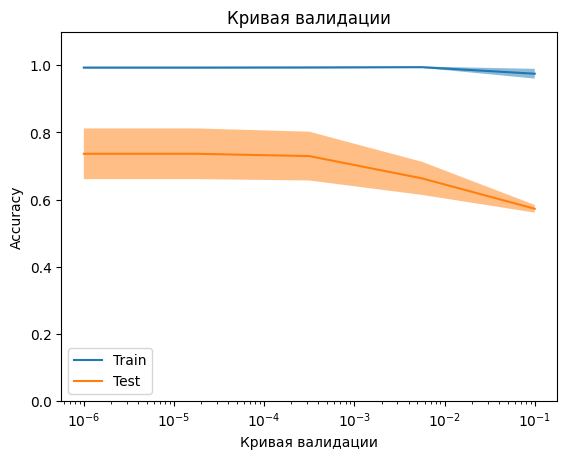

In [28]:
disp = ValidationCurveDisplay.from_estimator(
    SVC(),
    X,
    y,
    param_name="gamma",
    param_range=np.logspace(-6, -1, 5),
    score_type="both",
    n_jobs=2,
    score_name="Accuracy",
)
disp.ax_.set_title("Кривая валидации")
disp.ax_.set_xlabel(r"Кривая валидации")
disp.ax_.set_ylim(0.0, 1.1)
plt.show()

сохраняем модель

In [33]:
import pickle
filename = 'model.sav'
pickle.dump(model, open(filename, 'wb'))

In [36]:
pkl_filename = "pickle_model.pkl" 
with open(pkl_filename, 'wb') as file: 
    pickle.dump(model, file) 

with open(pkl_filename, 'rb') as file: 
    pickle_model = pickle.load(file) 

Из нее видно как test данные отличаються от train данных и это очень существенно 

Далее построим кривую обучения использую GaussianNB

In [30]:
naive_bayes = GaussianNB()
svc = SVC(kernel="rbf", gamma=0.001)

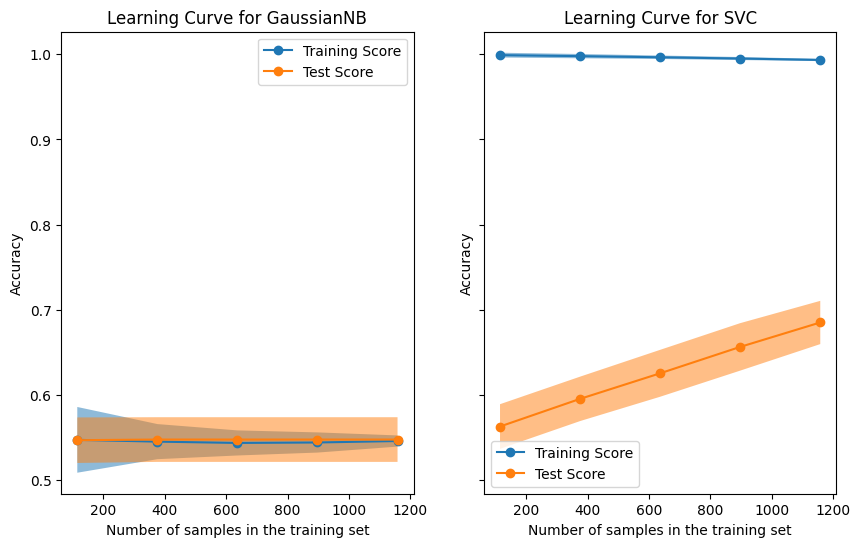

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

common_params = {
    "X": X,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([naive_bayes, svc]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

И в результате мы видим как обучалась модель

# 3.4 Подготовка отчета

В результате данного модуля были выполнены почти все задачи 

3.1 Сегментация пользователей
- Были сегментированны пользователи на основе RFM анализа. Исследованно поведение
пользователей из различных групп(уровни удержания клиентов, количество
совершенных покупок, время между покупками и т.д.). Проверена гипотеза
различий конверсии между пользователями всех полученных сегментов для
оценки функционала приложения. Дана интерпретацию полученных
результатов. Сделан вывод для оптимизации работы приложения.

3.2 Построение регрессионной модели
- На основе проведенного анализа выполнен и обоснован выбор наиболее
оптимальных алгоритмов машинного обучения в соответствии со спецификой
решаемой задачи. Добавлен сегмент целевой аудитории в качестве атрибута в
набор данных для более точной работы выбранной модели.
Набор данных был разделен на обучающую и тестовую подвыборки. Первая
использована для настройки весовых коэффициентов, а вторая для
проверки корректности настроенной модели.
Проведено обучение моделей, основанных на различных алгоритмах. Сделан
прогноз стоимости привлечения пользователей на валидационной выборке.
Выполнена оценка моделей разной степени сложности в соответствии с
выбранной метрикой. Определена модель, показавшую лучшее качество,
а тоесть SVM показаваший результат ~0.47, а другие RandomForest ~0.41 ,Knn ~0.39

3.3 Оптимизация модели
- Путём преобразования набора данных, получен более точный результат работы
выбранной модели. Описаны приемы генерации новых данных и результаты, к
которым они привели, рассматривая все ранее определенные показатели
качества. Оценено качество полученной модели, сделан вывод.
Была оптимизирована модель под решаемую задачу,
настраивая гиперпараметры. Выполнена оценка данной модели после
настройки гиперпараметров. Построены кривые валидации и
обучения, интерпретиваны полученные результаты. И в результате мы получили модель с точностью 0.545584

3.4 Подготовка отчета
- Был подготовлен отчет о проделанной работе по итогам сессии, в котором
представлены результаты, выводы и обоснования выбора по каждому разделу
задания. Результаты работы состоят из отчетов в форматах: .ipynb и
.html, а также исходников с возможностью перекомпиляции. Архив Data.zip
содержит все результаты выполнения модуля, а также все необходимые
файлы для запуска и проверки участков кода. В файле Readme.txt
описано содержимое результирующих файлов архива Data.zip.